In [1]:
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# retrieving data from website in CSV format
iris = pd.read_csv('http://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris_wheader.csv')
iris.head()
# there are 4 features and the 'class' column is the target/label

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
print(iris.info()) # prints out columns and their types and number in series format
# this is important as to make sure there's no missing data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_wid  150 non-null    float64
 2   petal_len  150 non-null    float64
 3   petal_wid  150 non-null    float64
 4   class      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


<AxesSubplot:xlabel='sepal_len', ylabel='sepal_wid'>

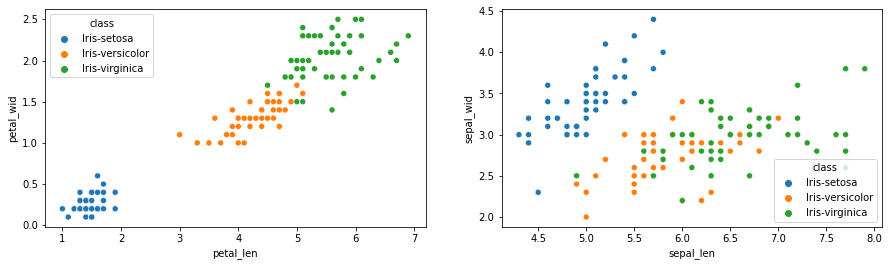

In [4]:
# Plotting the data
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

sns.scatterplot(x = iris['petal_len'], y = iris['petal_wid'], hue = iris['class'], ax=axs[0])
sns.scatterplot(x = iris['sepal_len'], y = iris['sepal_wid'], hue = iris['class'], ax=axs[1])

C:\Users\joe_h\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


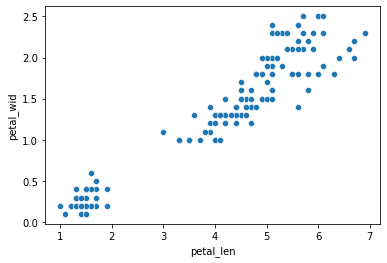

In [5]:
sns.scatterplot(iris['petal_len'], iris['petal_wid']);
# looking at correlation between petal length and width
# seems to show a strong positive correlation between these 2 features

In [6]:
iris.describe()

,sepal_len,sepal_wid,petal_len,petal_wid
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_wid  150 non-null    float64
 2   petal_len  150 non-null    float64
 3   petal_wid  150 non-null    float64
 4   class      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


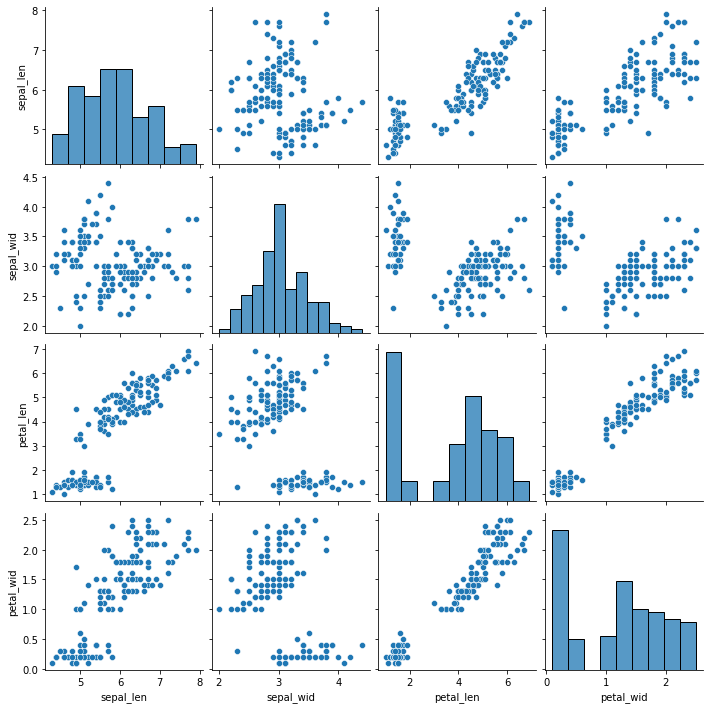

In [8]:
sns.pairplot(iris)
# plot showing pairwise relationships in a dataset

[]

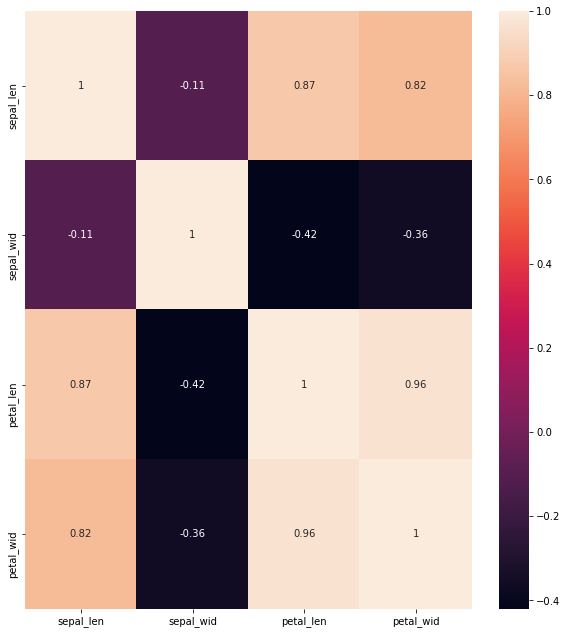

In [9]:
plt.figure(figsize=(10,11))
sns.heatmap(iris.corr(), annot=True)
plt.plot()
# using seaborn for a heatmap displaying correlation between all the features
# shows strong positive correlation between:
# - sepal length and petal length
# - sepal length and petal width
# - petal width and petal length
# shows a weak negative correlation between:
# - sepal width and petal length
# - sepal width and petal width

,sepal_len,sepal_wid,petal_len,petal_wid
sepal_len,1.000000,-0.109369,0.871754,0.817954
sepal_wid,-0.109369,1.000000,-0.420516,-0.356544
petal_len,0.871754,-0.420516,1.000000,0.962757
petal_wid,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

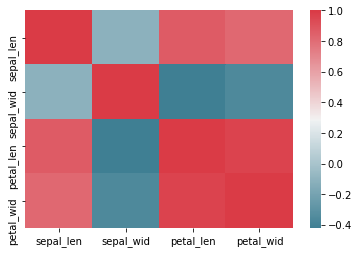

In [10]:
# Calculating the Pearson Coefficient between all features

corr_df = iris.corr(method="pearson")
display(corr_df)

sns.heatmap(corr_df, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels = corr_df.columns.values,
            yticklabels = corr_df.columns.values)

# Using Linear Regression to find coefficient of determination

In [11]:
[col for col in iris.columns]
# checking column titles

['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

In [12]:
# this can be changed to see what features we want to use as a predictor
feature = ['petal_len'] # one feature chosen to be put into a list called 'predictors'
#feature = ['sepal_len'], ['sepal_wid'], ['petal_wid']

In [13]:
label = ['petal_wid']
# a list for the target/output of the model
# we are trying to predict petal width based on petal length

In [14]:
x = iris[feature]
# creating a training set out of the 'iris' data which has a list of predictors

In [15]:
y = iris[label] 
# same for output (just want the label it was classified as)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# mean squared error tells us how different our predictions are from the ground truth outputs
# R2 indicates how much variation of a dependent (output label) variable is explained by the independent (feature used to predict) variable

In [18]:
# one way of spliting the data into a training and testing set
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [19]:
# training the model with the training data set
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [20]:
# this R2 score tells us how well the model is making predictions about the output, given the current inputs (1 is best possible)
linreg.score(x_test, y_test)

0.9352372529402148

In [23]:
# make predictions using the testing set
iris_y_pred = linreg.predict(x_test)

# the regression coefficient (slope of the curve)
print('Coefficients: ', linreg.coef_)

# the mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, iris_y_pred))

# the coefficient of determination: 1 is perfect, 0 is terrible
print('Coefficient of determination: %.2f'
      % r2_score(y_test, iris_y_pred))


Coefficients:  [[0.41354363]]
Mean squared error: 0.04
Coefficient of determination: 0.94
